# Project - Visual Data Analysis

In [1]:
# In this Project we are visually analyze the Gapminder Dataset. Animating the changes of life Expectancy and Fertility and showing the
# population number of each country for each year starting from 1960 until 2015

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
%matplotlib inline
#Reading data
fert = pd.read_csv('../../data/gapminder_total_fertility.csv',index_col=0)
life = pd.read_excel('../../data/gapminder_lifeexpectancy.xlsx',nrows=260,index_col=0)
population = pd.read_excel('../../data/gapminder_population.xlsx' ,nrows=260, index_col=0)
continents = pd.read_csv('../../data/continents.csv', sep=';',index_col=0)


In [3]:
# converting into long format, converting strings into int, renaming wrong labels and restting indexes
life.columns
fert.columns = fert.columns.astype(int)
fert.index.name='country'
life.index.name='country'
population.index.name='country'
fert = fert.reset_index()
population = population.reset_index()
life = life.reset_index()
continents = continents.reset_index()



In [4]:
# melting data and adding needed labels e.g year, fertility
fert = fert.melt(id_vars='country',var_name='year', value_name='fertility')
life = life.melt(id_vars='country',var_name='year', value_name='life_expectancy')
population = population.melt(id_vars='country',var_name='year', value_name='total_population')



In [5]:
#merging data into one DataFrame
df = fert.merge(population).merge(life).merge(continents)


# Plotting

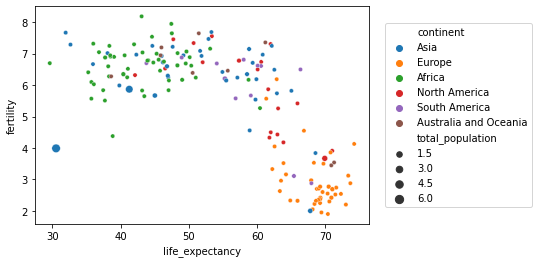

In [6]:
#dropping Nan values
df['total_population'].dropna()
df['fertility'].dropna()
df['life_expectancy'].dropna()
df['continent'].dropna()

#creating a scatterplot of the year 1960
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df['year']== 1960]
sns.scatterplot(x='life_expectancy', y='fertility',data=df_subset,size='total_population',hue='continent' ,alpha=1)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()


In [7]:
#plotting an animation  of the plots from 1960 to 2015
import numpy as np
#change the c string into a countryname to see the changes of that country through the years in the animation 
c='Yemen'
import imageio
images = []
for i in range (1960,2016):
    df_subset = df.loc[df['year']== i]
    sns.scatterplot( x= 'life_expectancy', 
                     y= 'fertility',
                     data= df_subset,
                     size= 'total_population',
                     hue='continent',
                     alpha= 0.8 )
    plt.title(f'{i}')
    plt.axis((10, 90, 1, 10))
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
    plt.text(df_subset.life_expectancy[df_subset.country==c],df_subset.fertility[df_subset.country==c],c, color='red')      
    plt.savefig(f'lifeexp_{i}.png')
    plt.close()
    
    
#creating the gif    
for s in range(1960, 2016):
    filename = f'lifeexp_{s}.png'.format(s)
    images.append(imageio.imread(filename))
imageio.mimsave(f'output{c}.gif', images, fps=8)


# Remove images/.png
import os
for s in range(1960, 2016):
    os.remove(f'lifeexp_{s}.png')

###from Internet to display the gif in Jupyter   
from pathlib import Path
gifPath = Path(f'output{c}.gif')

from IPython import display
from IPython.display import Image
from pathlib import Path
gifPath = Path(f'output{c}.gif')
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')
    

#Check the gif in the folder and play it
